<a href="https://colab.research.google.com/github/agdev/SDS-CP008-superstore-customer-segmentation/blob/main/notebooks/alex/SDS_CP008_superstore_customer_segmentation_Notebook_2_Clustering_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pydantic-settings -qU
# !pip install pandas-profiling[notebook] -qU
!pip install --upgrade pandas-profiling -qU

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 50.2 MB/s eta 0:00:00


# **Importing libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import plotly
import plotly.express as px
import plotly.graph_objs as gobj
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from plotly import figure_factory as FF
from pprint import pprint
import plotly.express as px
import warnings
import os
warnings.filterwarnings('ignore')

In [3]:
# print('os.curdir', os.curdir)
print('os.getcwd()', os.getcwd())
print('os.listdir()', os.listdir())

os.getcwd() /content
os.listdir() ['.config', 'Sample - Superstore.csv', 'sample_data']


# **Uploading Files**

In [4]:
from google.colab import files

import io

if not os.path.exists('Sample - Superstore.csv'):
  uploaded = files.upload()
  df = pd.read_csv(io.BytesIO(uploaded['Sample - Superstore.csv']), encoding='latin1')
else:
  df = pd.read_csv(r'/content/Sample - Superstore.csv', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# **Current Features/Variables**

In [5]:
for col in df.columns:
  print(col)

Row ID
Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
Country
City
State
Postal Code
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
print('The dataset has {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

The dataset has 9994 rows and 21 columns.


# **Converting Date columns to date type**

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='mixed')
df['Ship Date']  = pd.to_datetime(df['Ship Date'],format='mixed')

# **Unique values per column**

In [10]:
print(df.nunique())

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64


In [11]:
df = df.drop(['Row ID', 'Customer Name', 'Country'], axis=1)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [12]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [13]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

# **Orders by location**

In [14]:
orders_by_loc = df.groupby(['Region','State','Postal Code'])['Order ID'].nunique().reset_index(name='N_Orders');
display(orders_by_loc)

,Region,State,Postal Code,N_Orders
0,Central,Illinois,60004,1
1,Central,Illinois,60016,2
2,Central,Illinois,60025,1
3,Central,Illinois,60035,3
4,Central,Illinois,60067,1
...,...,...,...,...
626,West,Washington,98632,2
627,West,Washington,98661,3
628,West,Washington,99207,5
629,West,Washington,99301,2


In [15]:
orders_by_loc['All'] = 'All'

fig_neg = px.treemap(orders_by_loc,path=['All','Region','State','Postal Code'],values='N_Orders',width=950,height=700);
fig_neg.update_layout(title_text='Total Number of Orders by Location',title_x=0.5,title_font=dict(size=25));
fig_neg.update_layout(margin=dict(t=50,l=25,r=25,b=25),paper_bgcolor="black",font=dict(color="white",size=18));
fig_neg.data[0].textinfo = 'label+value+percent parent'

plt.tight_layout();
fig_neg.show();

<Figure size 640x480 with 0 Axes>

# **Profit by Location**

In [16]:
profit_by_loc = df.groupby(['Region','State','Postal Code'])['Profit'].sum().reset_index();
display(profit_by_loc)

,Region,State,Postal Code,Profit
0,Central,Illinois,60004,1.2348
1,Central,Illinois,60016,-236.7674
2,Central,Illinois,60025,13.8579
3,Central,Illinois,60035,-169.9406
4,Central,Illinois,60067,23.2624
...,...,...,...,...
626,West,Washington,98632,38.8983
627,West,Washington,98661,75.4546
628,West,Washington,99207,172.2261
629,West,Washington,99301,357.5244


In [17]:
# Split the data into positive and negative profit dataframes
pos_profit = profit_by_loc[profit_by_loc['Profit'] > 0]
neg_profit = profit_by_loc[profit_by_loc['Profit'] < 0]

In [18]:
pos_profit['All'] = 'All'

fig = px.treemap(pos_profit, path=['All','Region','State','Postal Code'], values='Profit', width=950, height=700);
fig.update_layout(title_text='Positive Profit by Location',title_x=0.5,title_font=dict(size=25));
fig.update_layout(margin=dict(t=50,l=25,r=25,b=25),paper_bgcolor="black",font=dict(color="white",size=18));
fig.data[0].textinfo = 'label+value+percent parent'
# fig.data[0].hoverinfo = 'label+value+percent parent'
# Customize the tooltip format using hovertemplate
fig.data[0].hovertemplate = (
    'Location: %{label}<br>'   # Display the label (e.g., Postal Code or State)
    'Profit: $%{value:,}<br>'  # Display the value with formatting for currency
    'Percent of parent: %{percentParent:.2%}<br>'  # Show the percentage contribution
    '<extra></extra>'  # Remove the extra trace information
)

# plt.tight_layout();
fig.show();

In [19]:
display(neg_profit)

,Region,State,Postal Code,Profit
1,Central,Illinois,60016,-236.7674
3,Central,Illinois,60035,-169.9406
5,Central,Illinois,60068,-238.4500
6,Central,Illinois,60076,-346.8700
7,Central,Illinois,60089,-89.6478
...,...,...,...,...
568,West,Colorado,81001,-900.9719
595,West,Oregon,97224,-216.2861
596,West,Oregon,97301,-262.3311
598,West,Oregon,97477,-853.3086


In [20]:
# Calculate the absolute values of the 'Profit' column
neg_profit_abs = neg_profit.copy()
neg_profit_abs['Profit'] = neg_profit['Profit'].abs()

In [21]:
neg_profit_abs['All'] = 'All'

fig_neg = px.treemap(neg_profit_abs, path=['All','Region','State','Postal Code'], values='Profit', width=950, height=700);
fig_neg.update_layout(title_text='Loss by Location',title_x=0.5,title_font=dict(size=25));
fig_neg.update_layout(margin=dict(t=50,l=25,r=25,b=25),paper_bgcolor="black",font=dict(color="white",size=18));
fig_neg.data[0].textinfo = 'label+value+percent parent'
# fig.data[0].hoverinfo = 'label+value+percent parent'
# Customize the tooltip format using hovertemplate
fig_neg.data[0].hovertemplate = (
    'Location: %{label}<br>'   # Display the label (e.g., Postal Code or State)
    'Profit: $%{value:,}<br>'  # Display the value with formatting for currency
    'Percent of parent: %{percentParent:.2%}<br>'  # Show the percentage contribution
    '<extra></extra>'  # Remove the extra trace information
)

# plt.tight_layout();
fig_neg.show();

# **Profit by Category and Sub-Category**

In [22]:
profit_by_categ = df.groupby(['Category','Sub-Category'])['Profit'].sum().reset_index();
display(profit_by_categ)

,Category,Sub-Category,Profit
0,Furniture,Bookcases,-3472.5560
1,Furniture,Chairs,26590.1663
2,Furniture,Furnishings,13059.1436
3,Furniture,Tables,-17725.4811
4,Office Supplies,Appliances,18138.0054
5,Office Supplies,Art,6527.7870
6,Office Supplies,Binders,30221.7633
7,Office Supplies,Envelopes,6964.1767
8,Office Supplies,Fasteners,949.5182
9,Office Supplies,Labels,5546.2540


In [23]:
# Split the data into positive and negative profit dataframes
pos_categ_profit = profit_by_categ[profit_by_categ['Profit'] > 0]
neg_categ_profit = profit_by_categ[profit_by_categ['Profit'] < 0]

In [24]:
pos_categ_profit['All'] = 'All'

fig = px.treemap(pos_categ_profit,path=['All','Category','Sub-Category'],values='Profit',width=950,height=700);
fig.update_layout(title_text='Profit by Category',title_x=0.5,title_font=dict(size=25));
fig.update_layout(margin=dict(t=50,l=25,r=25,b=25),paper_bgcolor="black",font=dict(color="white",size=18));
fig.data[0].textinfo = 'label+value+percent parent'
# fig.data[0].hoverinfo = 'label+value+percent parent'
# Customize the tooltip format using hovertemplate
fig.data[0].hovertemplate = (
    'Category: %{label}<br>'   # Display the label (e.g., Postal Code or State)
    'Profit: $%{value:,}<br>'  # Display the value with formatting for currency
    'Percent of parent: %{percentParent:.2%}<br>'  # Show the percentage contribution
    '<extra></extra>'  # Remove the extra trace information
)

# plt.tight_layout();
fig.show();

In [25]:
display(neg_categ_profit)

,Category,Sub-Category,Profit
0,Furniture,Bookcases,-3472.5560
3,Furniture,Tables,-17725.4811
12,Office Supplies,Supplies,-1189.0995


In [26]:
display(pos_categ_profit)

,Category,Sub-Category,Profit,All
1,Furniture,Chairs,26590.1663,All
2,Furniture,Furnishings,13059.1436,All
4,Office Supplies,Appliances,18138.0054,All
5,Office Supplies,Art,6527.7870,All
6,Office Supplies,Binders,30221.7633,All
7,Office Supplies,Envelopes,6964.1767,All
8,Office Supplies,Fasteners,949.5182,All
9,Office Supplies,Labels,5546.2540,All
10,Office Supplies,Paper,34053.5693,All
11,Office Supplies,Storage,21278.8264,All


In [27]:
# Calculate the absolute values of the 'Profit' column
neg_categ_profit_abs = neg_categ_profit.copy()
neg_categ_profit_abs['Profit'] = neg_categ_profit['Profit'].abs()
display(neg_categ_profit_abs)

,Category,Sub-Category,Profit
0,Furniture,Bookcases,3472.5560
3,Furniture,Tables,17725.4811
12,Office Supplies,Supplies,1189.0995


In [28]:
neg_categ_profit_abs['All'] = 'All'

fig_neg = px.treemap(neg_categ_profit_abs,path=['All','Category','Sub-Category'],values='Profit',width=950,height=700);
fig_neg.update_layout(title_text='Loss by Category',title_x=0.5,title_font=dict(size=25));
fig_neg.update_layout(margin=dict(t=50,l=25,r=25,b=25),paper_bgcolor="black",font=dict(color="white",size=18));
fig_neg.data[0].textinfo = 'label+value+percent parent'
# fig.data[0].hoverinfo = 'label+value+percent parent'
# Customize the tooltip format using hovertemplate
fig_neg.data[0].hovertemplate = (
    'Category: %{label}<br>'   # Display the label (e.g., Postal Code or State)
    'Profit: $%{value:,}<br>'  # Display the value with formatting for currency
    'Percent of parent: %{percentParent:.2%}<br>'  # Show the percentage contribution
    '<extra></extra>'  # Remove the extra trace information
)

# plt.tight_layout();
fig_neg.show();

# **Calculating LTV of customers**

In [29]:
df_clv = df[['Customer ID', 'Discount', 'Sales', 'Profit','Order Date', 'Ship Date','Order ID','Segment']]
print(df_clv.head())

  Customer ID  Discount     Sales    Profit Order Date  Ship Date  \
0    CG-12520      0.00  261.9600   41.9136 2016-11-08 2016-11-11   
1    CG-12520      0.00  731.9400  219.5820 2016-11-08 2016-11-11   
2    DV-13045      0.00   14.6200    6.8714 2016-06-12 2016-06-16   
3    SO-20335      0.45  957.5775 -383.0310 2015-10-11 2015-10-18   
4    SO-20335      0.20   22.3680    2.5164 2015-10-11 2015-10-18   

         Order ID    Segment  
0  CA-2016-152156   Consumer  
1  CA-2016-152156   Consumer  
2  CA-2016-138688  Corporate  
3  US-2015-108966   Consumer  
4  US-2015-108966   Consumer  


# **Creating a new Feature "Lifespan"**

In [30]:
# Calculate the lifespan for each customer
customer_lifespan = df_clv.groupby('Customer ID').agg({'Order Date': ['min', 'max']})
customer_lifespan.columns = ['FirstOrder', 'LastOrder']

# Calculate lifespan in days
customer_lifespan['LifespanDays'] = (customer_lifespan['LastOrder'] - customer_lifespan['FirstOrder']).dt.days

# Optionally convert lifespan to years
customer_lifespan['LifespanYears'] = customer_lifespan['LifespanDays'] / 365

print(customer_lifespan)

            FirstOrder  LastOrder  LifespanDays  LifespanYears
Customer ID                                                   
AA-10315    2014-03-31 2017-06-29          1186       3.249315
AA-10375    2014-04-21 2017-12-11          1330       3.643836
AA-10480    2014-05-04 2017-04-15          1077       2.950685
AA-10645    2014-06-22 2017-11-05          1232       3.375342
AB-10015    2014-02-18 2016-11-10           996       2.728767
...                ...        ...           ...            ...
XP-21865    2014-01-20 2017-11-17          1397       3.827397
YC-21895    2014-11-17 2017-12-26          1135       3.109589
YS-21880    2015-01-12 2017-12-21          1074       2.942466
ZC-21910    2014-10-13 2017-11-06          1120       3.068493
ZD-21925    2014-08-27 2017-06-11          1019       2.791781

[793 rows x 4 columns]


In [31]:
df_clv = pd.merge(df_clv, customer_lifespan, on='Customer ID', how='left')
df_clv.head()

,Customer ID,Discount,Sales,Profit,Order Date,Ship Date,Order ID,Segment,FirstOrder,LastOrder,LifespanDays,LifespanYears
0,CG-12520,0.00,261.9600,41.9136,2016-11-08,2016-11-11,CA-2016-152156,Consumer,2015-10-15,2017-01-26,469,1.284932
1,CG-12520,0.00,731.9400,219.5820,2016-11-08,2016-11-11,CA-2016-152156,Consumer,2015-10-15,2017-01-26,469,1.284932
2,DV-13045,0.00,14.6200,6.8714,2016-06-12,2016-06-16,CA-2016-138688,Corporate,2016-06-12,2017-12-11,547,1.498630
3,SO-20335,0.45,957.5775,-383.0310,2015-10-11,2015-10-18,US-2015-108966,Consumer,2015-10-11,2017-12-01,782,2.142466
4,SO-20335,0.20,22.3680,2.5164,2015-10-11,2015-10-18,US-2015-108966,Consumer,2015-10-11,2017-12-01,782,2.142466


In [32]:
# Calculate total sales for each customer
customer_sales = df_clv.groupby('Customer ID')['Sales'].sum()

# Calculate average order value (AOV)
aov = customer_sales / df_clv.groupby('Customer ID').size()

# Assume a purchase frequency (PF) and average customer lifespan (ACL)
pf = df_clv.groupby('Customer ID').size().mean()
acl = df_clv.groupby('Customer ID')['LifespanYears'].mean()
print('========aov========')
print(aov)
print('========pf========')
print(pf)
print('========acl========')
print(acl)
# Calculate CLV
clv = aov * pf * acl

# Create a new DataFrame with CLV
clv_df = pd.DataFrame({'Customer ID': clv.index, 'CLV': clv.values})
print('========clv_df========')
clv_df.head()

========aov========
Customer ID
AA-10315    505.778182
AA-10375     70.426000
AA-10480    149.209333
AA-10645    282.607500
AB-10015    147.692667
               ...    
XP-21865     84.809214
YC-21895    681.793750
YS-21880    560.037000
ZC-21910    258.893774
ZD-21925    165.993778
Length: 793, dtype: float64
========pf========
12.602774274905423
========acl========
Customer ID
AA-10315    3.249315
AA-10375    3.643836
AA-10480    2.950685
AA-10645    3.375342
AB-10015    2.728767
              ...   
XP-21865    3.827397
YC-21895    3.109589
YS-21880    2.942466
ZC-21910    3.068493
ZD-21925    2.791781
Name: LifespanYears, Length: 793, dtype: float64
========clv_df========


,Customer ID,CLV
0,AA-10315,20711.810944
1,AA-10375,3234.133602
2,AA-10480,5548.620046
3,AA-10645,12021.749781
4,AB-10015,5079.156139


# **Segmentation by Discount**

In [33]:
# Select Variables for Discount dataframe
df_discount = df[['Customer ID', 'Sales', 'Profit','Order Date', 'Discount','Segment','Region']]
print(df_discount.head())


  Customer ID     Sales    Profit Order Date  Discount    Segment Region
0    CG-12520  261.9600   41.9136 2016-11-08      0.00   Consumer  South
1    CG-12520  731.9400  219.5820 2016-11-08      0.00   Consumer  South
2    DV-13045   14.6200    6.8714 2016-06-12      0.00  Corporate   West
3    SO-20335  957.5775 -383.0310 2015-10-11      0.45   Consumer  South
4    SO-20335   22.3680    2.5164 2015-10-11      0.20   Consumer  South


In [34]:
# merging lifespan into dataframe
df_discount = pd.merge(df_discount, customer_lifespan, on='Customer ID', how='left')
df_discount.head()

,Customer ID,Sales,Profit,Order Date,Discount,Segment,Region,FirstOrder,LastOrder,LifespanDays,LifespanYears
0,CG-12520,261.9600,41.9136,2016-11-08,0.00,Consumer,South,2015-10-15,2017-01-26,469,1.284932
1,CG-12520,731.9400,219.5820,2016-11-08,0.00,Consumer,South,2015-10-15,2017-01-26,469,1.284932
2,DV-13045,14.6200,6.8714,2016-06-12,0.00,Corporate,West,2016-06-12,2017-12-11,547,1.498630
3,SO-20335,957.5775,-383.0310,2015-10-11,0.45,Consumer,South,2015-10-11,2017-12-01,782,2.142466
4,SO-20335,22.3680,2.5164,2015-10-11,0.20,Consumer,South,2015-10-11,2017-12-01,782,2.142466


In [35]:
df_discount_agg = df_discount.groupby('Customer ID').agg({'Sales': 'sum', 'Profit': 'sum', 'Discount':'mean', 'Segment':'max', 'Region':'max'})
print(df_discount_agg)

                Sales     Profit  Discount    Segment Region
Customer ID                                                 
AA-10315     5563.560  -362.8825  0.090909   Consumer   West
AA-10375     1056.390   277.3824  0.080000   Consumer   West
AA-10480     1790.512   435.8274  0.016667   Consumer  South
AA-10645     5086.935   857.8033  0.063889   Consumer   West
AB-10015      886.156   129.3465  0.066667   Consumer   West
...               ...        ...       ...        ...    ...
XP-21865     2374.658   621.2300  0.046429   Consumer   West
YC-21895     5454.350  1305.6290  0.075000  Corporate   West
YS-21880     6720.444  1778.2923  0.050000  Corporate   West
ZC-21910     8025.707 -1032.1490  0.254839   Consumer   West
ZD-21925     1493.944   249.1307  0.111111   Consumer   West

[793 rows x 5 columns]


# **Merge Discount, Life span and CLV**

In [36]:
# merging CLV into dataframe
merged = pd.merge(df_discount_agg, clv_df, on='Customer ID', how='left')
df_clv_dsc_lfspn = pd.merge(merged, customer_lifespan.drop(['FirstOrder','LastOrder'],axis=1,inplace=False), on='Customer ID', how='left')
df_clv_dsc_lfspn.head()

,Customer ID,Sales,Profit,Discount,Segment,Region,CLV,LifespanDays,LifespanYears
0,AA-10315,5563.560,-362.8825,0.090909,Consumer,West,20711.810944,1186,3.249315
1,AA-10375,1056.390,277.3824,0.080000,Consumer,West,3234.133602,1330,3.643836
2,AA-10480,1790.512,435.8274,0.016667,Consumer,South,5548.620046,1077,2.950685
3,AA-10645,5086.935,857.8033,0.063889,Consumer,West,12021.749781,1232,3.375342
4,AB-10015,886.156,129.3465,0.066667,Consumer,West,5079.156139,996,2.728767


In [37]:
df_clv_dsc_lfspn.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,793.0,2896.848500,2628.670117,4.8330,1146.050000,2256.394000,3785.276000,25043.050000
Profit,793.0,361.156396,894.261812,-6626.3895,36.613100,227.833800,560.007800,8981.323900
Discount,793.0,0.157482,0.089071,0.0000,0.090909,0.150000,0.211111,0.700000
CLV,793.0,7927.377748,7372.990364,0.0000,3573.834339,6292.811088,10188.000961,77097.810003
LifespanDays,793.0,999.650694,309.869711,0.0000,829.000000,1092.000000,1222.000000,1440.000000
LifespanYears,793.0,2.738769,0.848958,0.0000,2.271233,2.991781,3.347945,3.945205


In [38]:
df_clv_dsc_lfspn['Customer ID'].nunique()

793

In [39]:
df['Customer ID'].nunique()

793

# **CLV vs Discount**

In [40]:
fig = px.scatter(df_clv_dsc_lfspn, x="Discount", y="CLV", color="Segment",
                 title="Customer Lifetime Value vs Discount with Segment Differentiation")


fig.show()

# **Sales vs. Porift**

In [41]:
fig = px.scatter(df_clv_dsc_lfspn, x="Sales", y="Profit", color="Segment",
                 title="Customer Lifetime Value vs Discount with Segment Differentiation")


fig.show()

# **Discount vs. Porift**

In [302]:
fig = px.scatter(df_clv_dsc_lfspn, x="Discount", y="Profit", color="Segment",
                 title="Profit vs Discount with Segment Differentiation")


fig.show()

# **Lifespan vs . Discount**

In [43]:
fig = px.scatter(df_clv_dsc_lfspn, y="Discount", x="LifespanDays", color="Segment",
                 title="Customer Lifespan Days vs Discount with Segment Differentiation")


fig.show()

# **Lifespan vs. CLV**

In [44]:
fig = px.scatter(df_clv_dsc_lfspn, y="CLV", x="LifespanDays", color="Segment",
                 title="Customer Lifespan Days vs CLV with Segment Differentiation")


fig.show()

# **CLV vs. Profit**

In [45]:
fig = px.scatter(df_clv_dsc_lfspn, x="CLV", y="Profit", color="Segment",
                 title="CLV vs. Profit with Segment Differentiation")


fig.show()

# **CLV vs. Region**

In [46]:
# Group by region and calculate the mean CLV for each region
clv_by_region = df_clv_dsc_lfspn.groupby('Region')['CLV'].mean().reset_index()

# Create a bar chart
fig = px.bar(clv_by_region, x='Region', y='CLV', title='Average CLV per Region')
fig.show()


# **CLV vs. Segment**

In [47]:
# Group by region and calculate the mean CLV for each region
clv_by_segment = df_clv_dsc_lfspn.groupby('Segment')['CLV'].mean().reset_index()

# Create a bar chart
fig = px.bar(clv_by_segment, x='Segment', y='CLV', title='Average CLV per Segment')
fig.show()


# **Profit vs. Sales**

In [48]:
fig = px.scatter(df_clv_dsc_lfspn, x="Sales", y="Profit", color="Segment",
                 title="Sales vs. Profit with Segment Differentiation")


fig.show()

In [49]:
fig = px.histogram(df_clv_dsc_lfspn, x="CLV", color="Region", nbins=20,
                   title="Histogram of CLV with Region Deferentiation")
fig.show()

# **Segmentation Observations**

Observations from charts:
1. Discounts do not affect **CLV** or **Life span**.
2. The longer Life span is the greater CLV is, however magnitude of profit does not neccesarily increase

The Segmentation lense depends on what we are trying to achieve:
1. To identify worthy or more attention needed/deserved customers  I would look at CLV, Lifespan and Profit.
2. For Marketing and/or Support I would look at Region (maybe even on zipcode level) and Profit

# **Clustering Part**

In [50]:
df_clv_dsc_lfspn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    793 non-null    object 
 1   Sales          793 non-null    float64
 2   Profit         793 non-null    float64
 3   Discount       793 non-null    float64
 4   Segment        793 non-null    object 
 5   Region         793 non-null    object 
 6   CLV            793 non-null    float64
 7   LifespanDays   793 non-null    int64  
 8   LifespanYears  793 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 55.9+ KB


In [51]:
df_clustering =df_clv_dsc_lfspn[['Customer ID','Sales'	,'Profit'	,'Discount'	,'Region'	,'CLV'	,'LifespanYears']]
df_features = pd.get_dummies(df_clustering, columns=['Region']).drop(['Customer ID'], axis=1)
# Convert only the boolean columns to integers
bool_cols = df_features.select_dtypes(include='bool').columns
df_features[bool_cols] = df_features[bool_cols].astype(int)
print(df_features.head(10))

       Sales     Profit  Discount           CLV  LifespanYears  \
0   5563.560  -362.8825  0.090909  20711.810944       3.249315   
1   1056.390   277.3824  0.080000   3234.133602       3.643836   
2   1790.512   435.8274  0.016667   5548.620046       2.950685   
3   5086.935   857.8033  0.063889  12021.749781       3.375342   
4    886.156   129.3465  0.066667   5079.156139       2.728767   
5   7755.620  2054.5885  0.044444  11604.112026       2.136986   
6  14473.571  5444.8055  0.240000  26611.453822       2.917808   
7    966.710   313.6597  0.133333   3769.012290       3.712329   
8   1113.838   220.8130  0.135714   3062.965854       3.054795   
9    914.532   264.5675  0.100000   2460.758050       2.989041   

   Region_Central  Region_East  Region_South  Region_West  
0               0            0             0            1  
1               0            0             0            1  
2               0            0             1            0  
3               0            0   

In [52]:
df_clustering.head(10)

,Customer ID,Sales,Profit,Discount,Region,CLV,LifespanYears
0,AA-10315,5563.560,-362.8825,0.090909,West,20711.810944,3.249315
1,AA-10375,1056.390,277.3824,0.080000,West,3234.133602,3.643836
2,AA-10480,1790.512,435.8274,0.016667,South,5548.620046,2.950685
3,AA-10645,5086.935,857.8033,0.063889,West,12021.749781,3.375342
4,AB-10015,886.156,129.3465,0.066667,West,5079.156139,2.728767
5,AB-10060,7755.620,2054.5885,0.044444,West,11604.112026,2.136986
6,AB-10105,14473.571,5444.8055,0.240000,West,26611.453822,2.917808
7,AB-10150,966.710,313.6597,0.133333,East,3769.012290,3.712329
8,AB-10165,1113.838,220.8130,0.135714,West,3062.965854,3.054795
9,AB-10255,914.532,264.5675,0.100000,West,2460.758050,2.989041


In [53]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sales           793 non-null    float64
 1   Profit          793 non-null    float64
 2   Discount        793 non-null    float64
 3   CLV             793 non-null    float64
 4   LifespanYears   793 non-null    float64
 5   Region_Central  793 non-null    int64  
 6   Region_East     793 non-null    int64  
 7   Region_South    793 non-null    int64  
 8   Region_West     793 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 55.9 KB


In [54]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import OneHotEncoder

# **Functions**

In [156]:
from typing import Tuple
# Standardize the encoded data
def get_scaler(df) -> Tuple[StandardScaler, np.ndarray]:
    scaler = StandardScaler()
    scaled_df = scaler.fit_transform(df)
    return scaler, scaled_df

In [157]:
def plot_elbow(scaled_data,title="Elbow Method for Optimal K", max_clusters=10):
  """
     Determine the optimal number of clusters using the Elbow method
  """
  inertia = []
  for i in range(1, max_clusters+1):
      kmeans = KMeans(n_clusters=i, random_state=42)
      kmeans.fit(scaled_data)
      inertia.append(kmeans.inertia_)

  plt.plot(range(1, 11), inertia, marker='o')
  plt.title(title)
  plt.xlabel('Number of Clusters')
  plt.ylabel('Inertia')
  plt.show()

In [237]:
df_score = pd.DataFrame(columns=['Label', 'Silhouette_Score', 'Inertia'])

In [ ]:
# prompt: add to df_score rst new line but first search for for_label and only when it does not exist add new row

def add_rst_to_df_score(df_score, label, silhouette_score_val, inertia_val):
  """
  Adds a new row to df_score only if a row with the given label doesn't exist.

  Args:
    df_score: The DataFrame to add to.
    label: The label to check for and use in the new row.
    silhouette_score_val: The Silhouette Score value for the new row.
    inertia_val: The Inertia value for the new row.
  """
  if not df_score[df_score['Label'] == label].empty:
    return  # Do nothing if the label already exists

  new_row = pd.DataFrame({'Label': [label],
                        'Silhouette_Score': [silhouette_score_val],
                        'Inertia': [inertia_val]})
  df_score = pd.concat([df_score, new_row], ignore_index=True)
  return df_score

In [299]:
def predict_get_silohuette(scaled_data, df_for_cluster, n_clusters,for_label="Silhouette Score", cluster_col_name='Cluster') -> Tuple[KMeans, float]:
  # Apply K-Means clustering
  kmeans = KMeans(n_clusters=n_clusters, random_state=42)
  df_for_cluster[cluster_col_name] = kmeans.fit_predict(scaled_data)
  # Evaluate the clustering using silhouette score
  silhouette_avg = silhouette_score(scaled_data, df_for_cluster[cluster_col_name])

  print(f"'Silhouette Score for {for_label}': {silhouette_avg}")
  print(f"'Inertia for {for_label}': {kmeans.inertia_}")
  row_exists = df_score[df_score['Label'] == for_label]
  if row_exists.empty:
    df_score.loc[len(df_score)] = [for_label, silhouette_avg, kmeans.inertia_]
  else:
    df_score.loc[row_exists.index[0], 'Silhouette_Score'] = silhouette_avg
    df_score.loc[row_exists.index[0], 'Inertia'] = kmeans.inertia_
  return kmeans, silhouette_avg

In [266]:
def replace_categ_column(df, categ_column_name) -> pd.DataFrame:
    df_rd = pd.get_dummies(df, columns=[categ_column_name]).drop(['Customer ID'], axis=1)
    # Convert only the boolean columns to integers
    bool_cols = df_rd.select_dtypes(include='bool').columns
    df_rd[bool_cols] = df_rd[bool_cols].astype(int)
    return df_rd

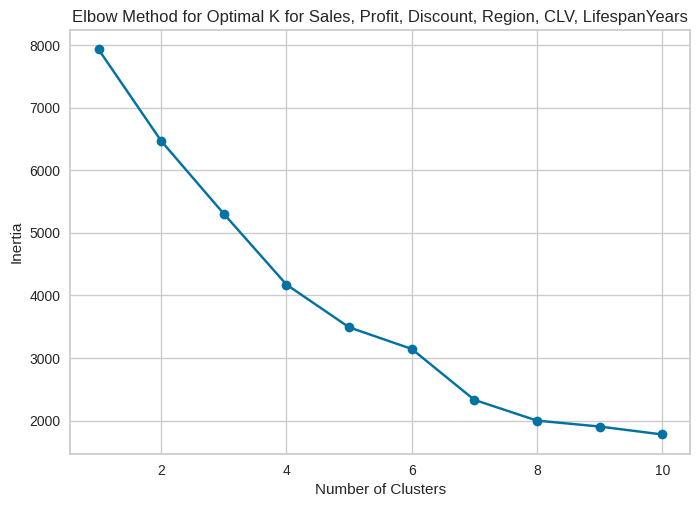

In [267]:
scaler, scaled_df_features = get_scaler(df_features)
plot_elbow(scaled_df_features, title='Elbow Method for Optimal K for Sales, Profit, Discount, Region, CLV, LifespanYears')

In [268]:
predict_get_silohuette(scaled_df_features, df_features, n_clusters= 7, for_label='Sales, Profit, Discount, Region, CLV, LifespanYears')

'Silhouette Score for Sales, Profit, Discount, Region, CLV, LifespanYears': 0.38314100251413874
'Inertia for Sales, Profit, Discount, Region, CLV, LifespanYears': 2330.9878773693076


(KMeans(n_clusters=7, random_state=42), 0.38314100251413874)

In [269]:
df_profit_region =df_clv_dsc_lfspn[['Customer ID','Profit'	,'Region']]
df_profit_region_rd = replace_categ_column(df_profit_region, 'Region')

print(df_profit_region_rd.head(10))

      Profit  Region_Central  Region_East  Region_South  Region_West
0  -362.8825               0            0             0            1
1   277.3824               0            0             0            1
2   435.8274               0            0             1            0
3   857.8033               0            0             0            1
4   129.3465               0            0             0            1
5  2054.5885               0            0             0            1
6  5444.8055               0            0             0            1
7   313.6597               0            1             0            0
8   220.8130               0            0             0            1
9   264.5675               0            0             0            1


In [270]:
scaler, scaled_profit_region_rd_df = get_scaler(df_profit_region_rd)

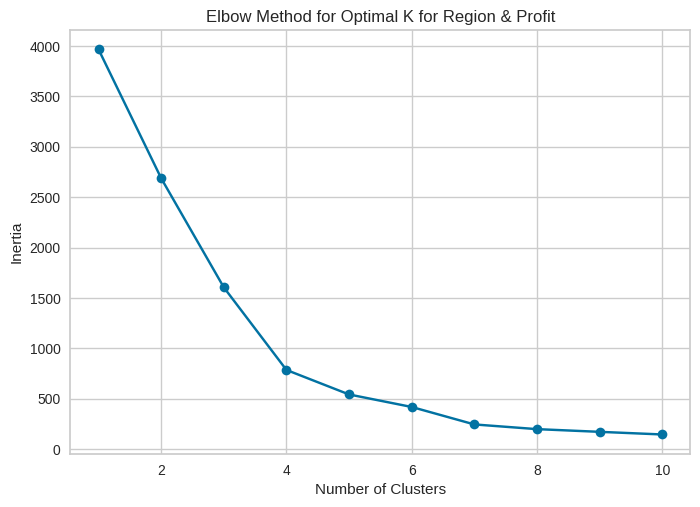

In [271]:
plot_elbow(scaled_profit_region_rd_df, title='Elbow Method for Optimal K for Region & Profit' )

In [272]:
predict_get_silohuette(scaled_profit_region_rd_df, df_profit_region_rd, n_clusters= 6, for_label='Region & Profit')

'Silhouette Score for Region & Profit': 0.7979047514926596
'Inertia for Region & Profit': 419.3050681446918


(KMeans(n_clusters=6, random_state=42), 0.7979047514926596)

In [273]:
# df_clustering_rd.head()
# df_profit_region.head()

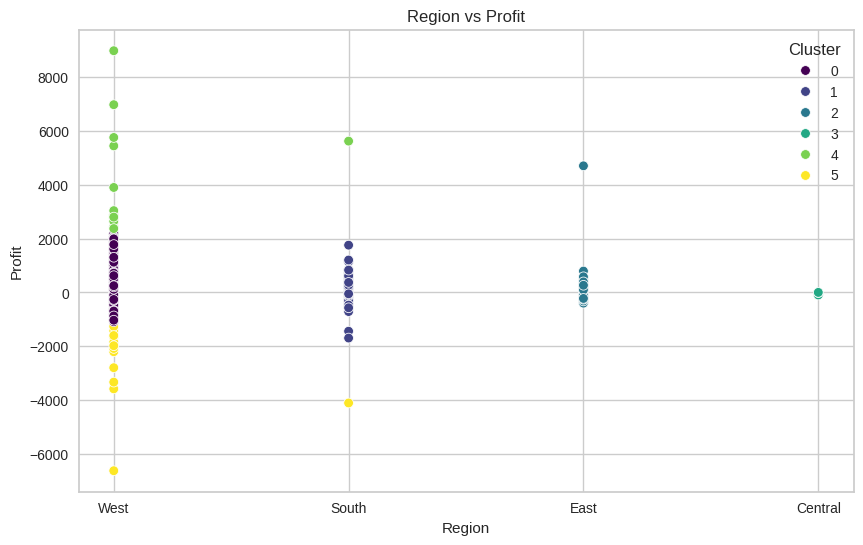

In [274]:
# prompt: draw scatter plot that region vs Profit using df_features_rd, for color use Cluster column
df_profit_region['Cluster']=df_profit_region_rd['Cluster']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Region', y='Profit', data=df_profit_region, hue='Cluster', palette='viridis')
plt.title('Region vs Profit')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()

# **CLV & Region**

In [275]:
# df_clustering =df_clv_dsc_lfspn[['Customer ID','Sales'	,'Profit'	,'Discount'	,'Region'	,'CLV'	,'LifespanYears']]
df_clv_region =df_clv_dsc_lfspn[['Customer ID','CLV'	,'Region']]
df_features_clv_rd = replace_categ_column(df_clv_region, 'Region')
df_features_clv_rd.head()

,CLV,Region_Central,Region_East,Region_South,Region_West
0,20711.810944,0,0,0,1
1,3234.133602,0,0,0,1
2,5548.620046,0,0,1,0
3,12021.749781,0,0,0,1
4,5079.156139,0,0,0,1


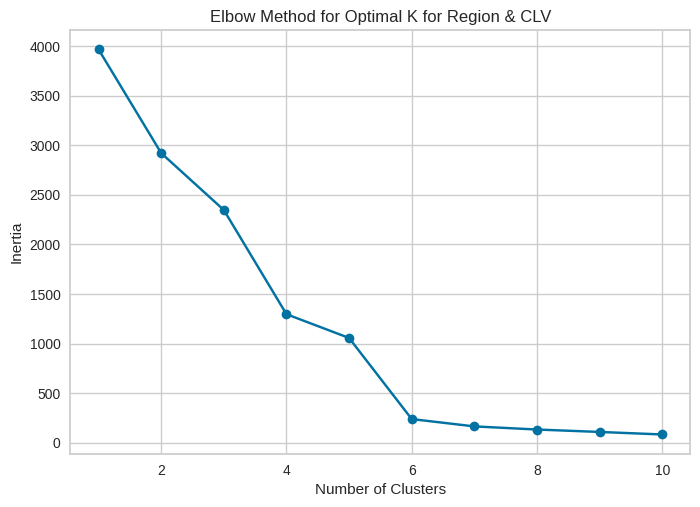

In [276]:
scaler_clv, scaled_clv_rd__df = get_scaler(df_features_clv_rd)
plot_elbow(scaled_clv_rd__df, title='Elbow Method for Optimal K for Region & CLV' )

In [277]:
predict_get_silohuette(scaled_clv_rd__df, df_features_clv_rd, n_clusters= 6, for_label='Region & CLV')

'Silhouette Score for Region & CLV': 0.6630732100518177
'Inertia for Region & CLV': 239.3096995748417


(KMeans(n_clusters=6, random_state=42), 0.6630732100518177)

# **Discount & Region**


In [278]:
# df_clustering =df_clv_dsc_lfspn[['Customer ID','Sales'	,'Profit'	,'Discount'	,'Region'	,'CLV'	,'LifespanYears']]
df_dsc_rd =df_clv_dsc_lfspn[['Customer ID','Discount'	,'Region']]
df_features_dsc_rd = replace_categ_column(df_dsc_rd, 'Region')
df_features_dsc_rd.head()

,Discount,Region_Central,Region_East,Region_South,Region_West
0,0.090909,0,0,0,1
1,0.080000,0,0,0,1
2,0.016667,0,0,1,0
3,0.063889,0,0,0,1
4,0.066667,0,0,0,1


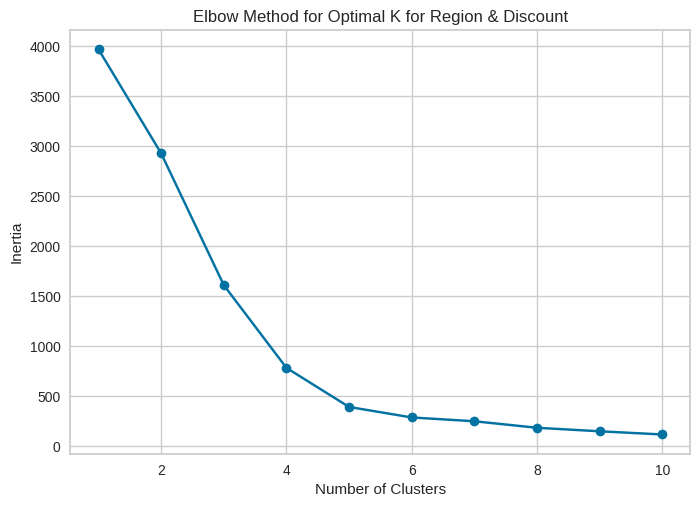

In [279]:
scaler_dsc, scaled_dsc_rd_df = get_scaler(df_features_dsc_rd)
plot_elbow(scaled_dsc_rd_df, title='Elbow Method for Optimal K for Region & Discount')

In [280]:
predict_get_silohuette(scaled_dsc_rd_df, df_features_dsc_rd, n_clusters= 4, for_label='Region & Discount')

'Silhouette Score for Region & Discount': 0.779239737916965
'Inertia for Region & Discount': 783.5268291016163


(KMeans(n_clusters=4, random_state=42), 0.779239737916965)

# **Profit**

In [281]:
df_profit =df_clv_dsc_lfspn[['Customer ID','Profit']]
df_profit_rd = df_profit.drop(['Customer ID'], axis=1)
df_profit_rd.head()

,Profit
0,-362.8825
1,277.3824
2,435.8274
3,857.8033
4,129.3465


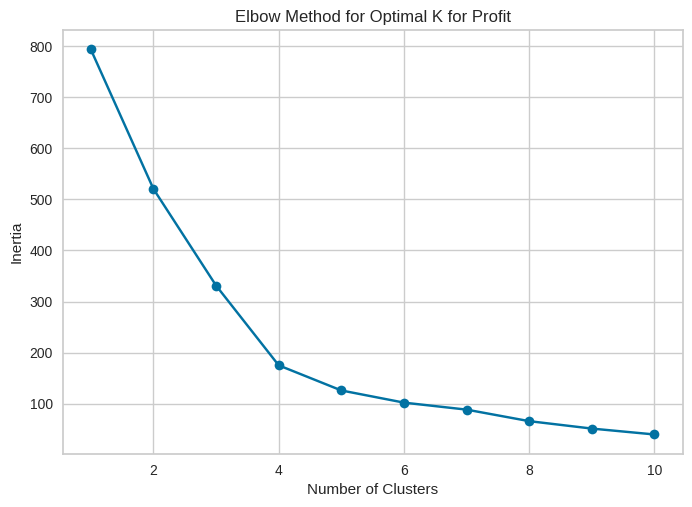

In [282]:
scaler_profit, scaled_profit_df = get_scaler(df_profit_rd)
plot_elbow(scaled_profit_df, title='Elbow Method for Optimal K for Profit')

In [283]:
predict_get_silohuette(scaled_profit_df, df_profit, n_clusters= 4, for_label='Profit')

'Silhouette Score for Profit': 0.6681606237168466
'Inertia for Profit': 175.3215495642655


(KMeans(n_clusters=4, random_state=42), 0.6681606237168466)

# **Discount**

In [284]:
df_dsc =df_clv_dsc_lfspn[['Customer ID','Discount']]
df_dsc_rd = df_dsc.drop(['Customer ID'], axis=1)
df_dsc_rd.head()

,Discount
0,0.090909
1,0.080000
2,0.016667
3,0.063889
4,0.066667


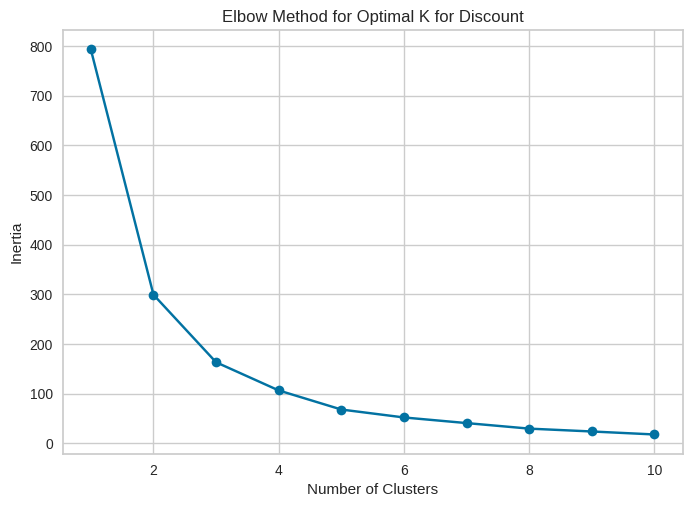

In [285]:
scaler_dsc, scaled_dsc_df = get_scaler(df_dsc_rd)
plot_elbow(scaled_dsc_df, title='Elbow Method for Optimal K for Discount')

In [286]:
predict_get_silohuette(scaled_dsc_df, df_dsc, n_clusters= 5, for_label='Discount')

'Silhouette Score for Discount': 0.5446509091061701
'Inertia for Discount': 68.25132143064823


(KMeans(n_clusters=5, random_state=42), 0.5446509091061701)

# **Profit & CLV**

In [293]:
df_profit_clv =df_clv_dsc_lfspn[['Customer ID','Profit', 'CLV']]
df_profit_clv_rd = df_profit_clv.drop(['Customer ID'], axis=1)
df_profit_clv.head()

,Customer ID,Profit,CLV
0,AA-10315,-362.8825,20711.810944
1,AA-10375,277.3824,3234.133602
2,AA-10480,435.8274,5548.620046
3,AA-10645,857.8033,12021.749781
4,AB-10015,129.3465,5079.156139


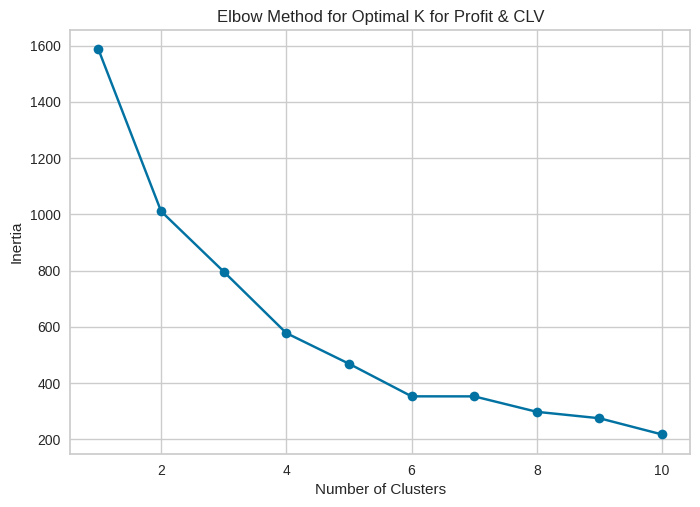

In [294]:
scaler_profit_clv, scaled_profit_clv_df = get_scaler(df_profit_clv_rd)
plot_elbow(scaled_profit_clv_df, title='Elbow Method for Optimal K for Profit & CLV')

In [300]:
predict_get_silohuette(scaled_profit_clv_df, df_profit_clv, n_clusters= 6, for_label='Profit & CLV')

'Silhouette Score for Profit & CLV': 0.41949167565025086
'Inertia for Profit & CLV': 352.6580915380073


(KMeans(n_clusters=6, random_state=42), 0.41949167565025086)

In [301]:
print(df_score.sort_values(by=['Silhouette_Score', 'Inertia'], ascending=[False, True]).to_markdown(tablefmt="grid"))

+----+-----------------------------------------------------+--------------------+-----------+
|    | Label                                               |   Silhouette_Score |   Inertia |
+====+=====================================================+====================+===========+
|  1 | Region & Profit                                     |           0.797905 |  419.305  |
+----+-----------------------------------------------------+--------------------+-----------+
|  3 | Region & Discount                                   |           0.77924  |  783.527  |
+----+-----------------------------------------------------+--------------------+-----------+
|  4 | Profit                                              |           0.668161 |  175.322  |
+----+-----------------------------------------------------+--------------------+-----------+
|  2 | Region & CLV                                        |           0.663073 |  239.31   |
+----+-----------------------------------------------------+